In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('../fat/bodyfat.csv')

In [3]:
df['Weight'] *= 0.45   #convert weight to kg , height to cm
df['Height'] *= 2.54

In [4]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,69.4125,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,77.9625,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,69.3000,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.1375,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,82.9125,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<AxesSubplot:>

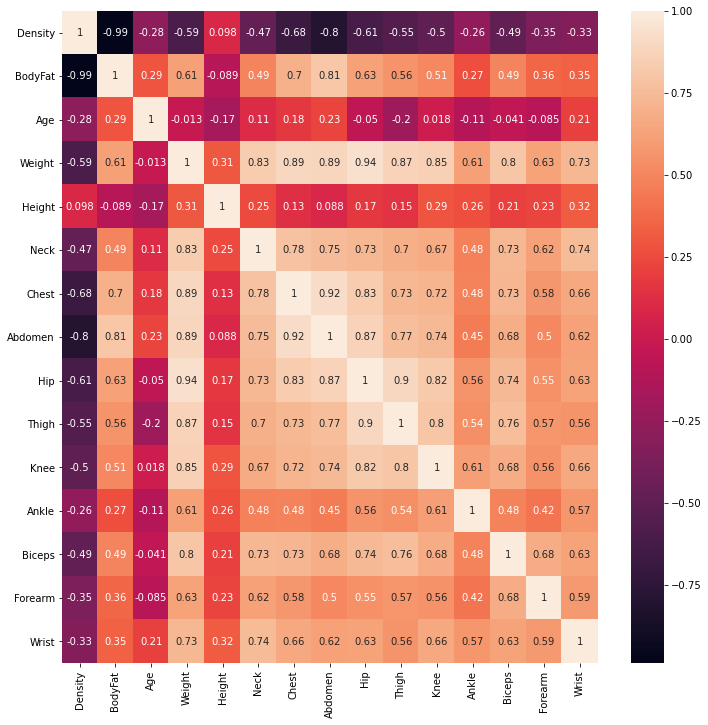

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True)

In [10]:
from sklearn.model_selection import train_test_split
x=np.array(df.drop(['BodyFat'], axis =1))
y=np.array(df['BodyFat'])
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler as scaler
scalerx=scaler()
scalery=scaler()

In [16]:
x_train_scale= scalerx.fit_transform(x_train)
x_test_scale= scalery.fit_transform(x_test)

In [23]:
lr = LR()
lr = lr.fit(x_train_scale, y_train)

In [25]:
y_pred = lr.predict(x_test_scale)

In [28]:
r2_score_lr = r2_score(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared = False)

In [29]:
print(f'R2 : {r2_score_lr}')
print(f'RMSE: {rmse_lr}')

R2 : 0.9604011870965584
RMSE: 1.5336564786040168


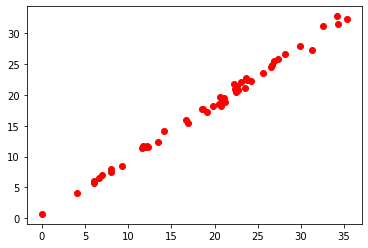

In [39]:
plt.scatter(y_pred, y_test,color="red" )
plt.xlabel="Predicted BodyFat"
plt.ylabel="Real BodyFat"